In [2]:
import sys
import os
cwd = os.getcwd()+'/filterpy/filterpy/kalman'
sys.path.insert(0,cwd)

In [3]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy.random as rd
from tqdm import tqdm, tnrange
from kalman_filter import KalmanFilter
from kl_kalman_filter import KLKalmanFilter
from numpy import dot

In [4]:
T = 1000
N = 1000
n = 2
m = 1
F = np.array([[0.9802,0.0196],[0,0.9802]])
Q = np.array([[1.9608,0.0195],[0.0195,1.9605]])
H = np.array([[1.,-1.]])
R = np.array([[1.]])
P = np.eye(n)
x0 = rd.randn(n)

Small time-invariant uncertainty

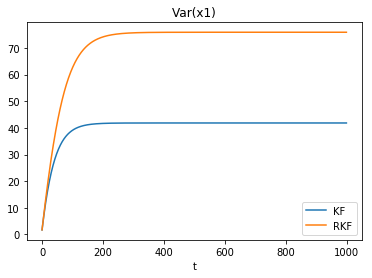

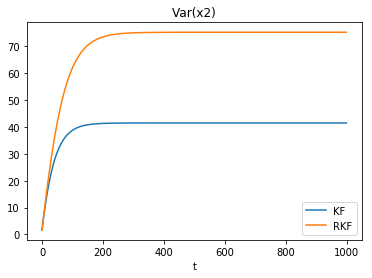

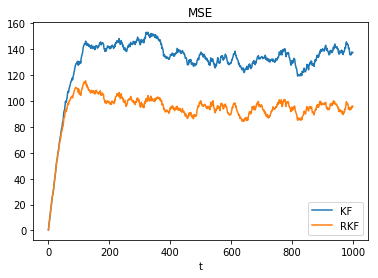

In [131]:
# uncertainty
Delta = 1.

# initialize placeholders
X = np.zeros((N,T,n))
Z = np.zeros((N,T,m))
Vkf = np.zeros((N,T,n))
Vrkf = np.zeros((N,T,n))
EVkf = np.zeros((N,T))
EVrkf = np.zeros((N,T))

# run trials
for i in tnrange(N):
    # initialize filters
    x0_hat = np.zeros(n)
    kf = KalmanFilter(dim_x=n, dim_z=m)
    kf.x = x0_hat
    kf.F = F
    kf.H = H
    kf.P = P
    kf.R = R
    kf.Q = Q

    rkf = KLKalmanFilter(dim_x=n, dim_z=m)
    rkf.x = x0_hat
    rkf.F = F
    rkf.H = H
    rkf.P = P
    rkf.R = R
    rkf.Q = Q

    delta = rd.uniform(-Delta,Delta)
    for t in range(T):
        # run model
        if t==0:
            X[i,t,:] = x0
        else:
            Ft = F + np.array([[0.,.099*delta],[0.,0.]])
            X[i,t,:] = dot(Ft,X[i,t-1,:]) + rd.multivariate_normal(np.zeros(n),Q)
        Z[i,t,:] = dot(H,X[i,t,:]) + rd.multivariate_normal(np.zeros(m),R)
        
        # run filter
        kf.predict()
        kf.update(Z[i,t,:])
        rkf.predict()
        rkf.update(Z[i,t,:],c=5e-5)
        Vkf[i,t,:] = np.diag(kf.P)
        Vrkf[i,t,:] = np.diag(rkf.P)
        EVkf[i,t] = np.linalg.norm(X[i,t,:]-kf.x)**2
        EVrkf[i,t] = np.linalg.norm(X[i,t,:]-rkf.x)**2
        
# compute averages over trials
Vkf = Vkf.mean(axis=0)
Vrkf = Vrkf.mean(axis=0)
EVkf = EVkf.mean(axis=0)
EVrkf = EVrkf.mean(axis=0)

# plot
ts = np.arange(T)
p = plt.figure()
plt.plot(ts,Vkf[:,0],label='KF')
plt.plot(ts,Vrkf[:,0],label='RKF')
plt.title('Var(x1)')
plt.xlabel('t')
plt.legend()
plt.show()
p.savefig('img/small_ti/v1.eps', format='eps', dpi=200)

p = plt.figure()
plt.plot(ts,Vkf[:,1],label='KF')
plt.plot(ts,Vrkf[:,1],label='RKF')
plt.title('Var(x2)')
plt.xlabel('t')
plt.legend()
plt.show()
p.savefig('img/small_ti/v2.eps', format='eps', dpi=200)

p = plt.figure()
plt.plot(ts,EVkf,label='KF')
plt.plot(ts,EVrkf,label='RKF')
plt.title('MSE')
plt.xlabel('t')
plt.legend()
plt.show()
p.savefig('img/small_ti/mse.eps', format='eps', dpi=200)

Large time-invariant uncertainty

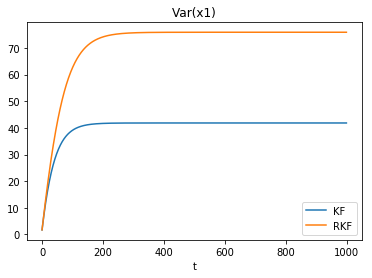

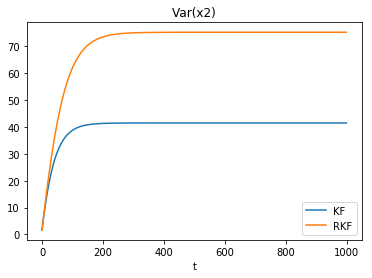

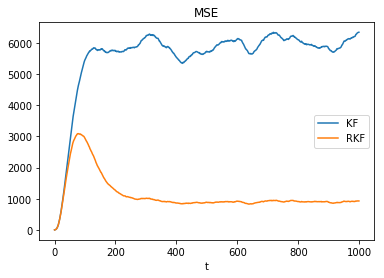

In [132]:
# uncertainty
Delta = 10.

# initialize placeholders
X = np.zeros((N,T,n))
Z = np.zeros((N,T,m))
Vkf = np.zeros((N,T,n))
Vrkf = np.zeros((N,T,n))
EVkf = np.zeros((N,T))
EVrkf = np.zeros((N,T))

# run trials
for i in tnrange(N):
    # initialize filters
    x0_hat = np.zeros(n)
    kf = KalmanFilter(dim_x=n, dim_z=m)
    kf.x = x0_hat
    kf.F = F
    kf.H = H
    kf.P = P
    kf.R = R
    kf.Q = Q

    rkf = KLKalmanFilter(dim_x=n, dim_z=m)
    rkf.x = x0_hat
    rkf.F = F
    rkf.H = H
    rkf.P = P
    rkf.R = R
    rkf.Q = Q

    delta = rd.uniform(-Delta,Delta)
    for t in range(T):
        # run model
        if t==0:
            X[i,t,:] = x0
        else:
            Ft = F + np.array([[0.,.099*delta],[0.,0.]])
            X[i,t,:] = dot(Ft,X[i,t-1,:]) + rd.multivariate_normal(np.zeros(n),Q)
        Z[i,t,:] = dot(H,X[i,t,:]) + rd.multivariate_normal(np.zeros(m),R)
        
        # run filter
        kf.predict()
        kf.update(Z[i,t,:])
        rkf.predict()
        rkf.update(Z[i,t,:],c=5e-5)
        Vkf[i,t,:] = np.diag(kf.P)
        Vrkf[i,t,:] = np.diag(rkf.P)
        EVkf[i,t] = np.linalg.norm(X[i,t,:]-kf.x)**2
        EVrkf[i,t] = np.linalg.norm(X[i,t,:]-rkf.x)**2
        
# compute averages over trials
Vkf = Vkf.mean(axis=0)
Vrkf = Vrkf.mean(axis=0)
EVkf = EVkf.mean(axis=0)
EVrkf = EVrkf.mean(axis=0)

# plot
ts = np.arange(T)
p = plt.figure()
plt.plot(ts,Vkf[:,0],label='KF')
plt.plot(ts,Vrkf[:,0],label='RKF')
plt.title('Var(x1)')
plt.xlabel('t')
plt.legend()
plt.show()
p.savefig('img/large_ti/v1.eps', format='eps', dpi=200)

p = plt.figure()
plt.plot(ts,Vkf[:,1],label='KF')
plt.plot(ts,Vrkf[:,1],label='RKF')
plt.title('Var(x2)')
plt.xlabel('t')
plt.legend()
plt.show()
p.savefig('img/large_ti/v2.eps', format='eps', dpi=200)

p = plt.figure()
plt.plot(ts,EVkf,label='KF')
plt.plot(ts,EVrkf,label='RKF')
plt.title('MSE')
plt.xlabel('t')
plt.legend()
plt.show()
p.savefig('img/large_ti/mse.eps', format='eps', dpi=200)

Small time varying uncertainty

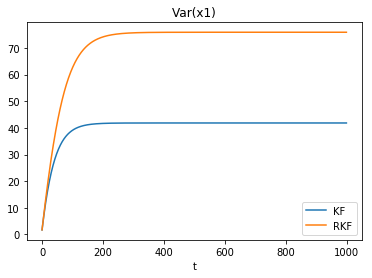

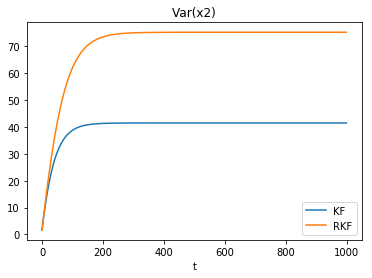

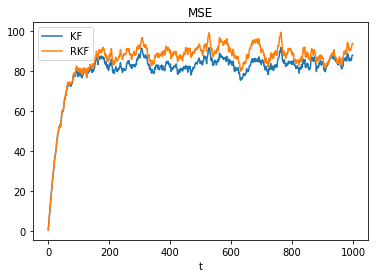

In [143]:
# uncertainty
Delta = 1.

# initialize placeholders
X = np.zeros((N,T,n))
Z = np.zeros((N,T,m))
Vkf = np.zeros((N,T,n))
Vrkf = np.zeros((N,T,n))
EVkf = np.zeros((N,T))
EVrkf = np.zeros((N,T))

# run trials
for i in tnrange(N):
    # initialize filters
    x0_hat = np.zeros(n)
    kf = KalmanFilter(dim_x=n, dim_z=m)
    kf.x = x0_hat
    kf.F = F
    kf.H = H
    kf.P = P
    kf.R = R
    kf.Q = Q

    rkf = KLKalmanFilter(dim_x=n, dim_z=m)
    rkf.x = x0_hat
    rkf.F = F
    rkf.H = H
    rkf.P = P
    rkf.R = R
    rkf.Q = Q

    for t in range(T):
        # run model
        delta = rd.uniform(-Delta,Delta)
        if t==0:
            X[i,t,:] = x0
        else:
            Ft = F + np.array([[0.,.099*delta],[0.,0.]])
            X[i,t,:] = dot(Ft,X[i,t-1,:]) + rd.multivariate_normal(np.zeros(n),Q)
        Z[i,t,:] = dot(H,X[i,t,:]) + rd.multivariate_normal(np.zeros(m),R)
        
        # run filter
        kf.predict()
        kf.update(Z[i,t,:])
        rkf.predict()
        rkf.update(Z[i,t,:],c=5e-5)
        Vkf[i,t,:] = np.diag(kf.P)
        Vrkf[i,t,:] = np.diag(rkf.P)
        EVkf[i,t] = np.linalg.norm(X[i,t,:]-kf.x)**2
        EVrkf[i,t] = np.linalg.norm(X[i,t,:]-rkf.x)**2
        
# compute averages over trials
Vkf = Vkf.mean(axis=0)
Vrkf = Vrkf.mean(axis=0)
EVkf = EVkf.mean(axis=0)
EVrkf = EVrkf.mean(axis=0)

# plot
ts = np.arange(T)
p = plt.figure()
plt.plot(ts,Vkf[:,0],label='KF')
plt.plot(ts,Vrkf[:,0],label='RKF')
plt.title('Var(x1)')
plt.xlabel('t')
plt.legend()
plt.show()
p.savefig('img/small_tv/v1.eps', format='eps', dpi=200)

p = plt.figure()
plt.plot(ts,Vkf[:,1],label='KF')
plt.plot(ts,Vrkf[:,1],label='RKF')
plt.title('Var(x2)')
plt.xlabel('t')
plt.legend()
plt.show()
p.savefig('img/small_tv/v2.eps', format='eps', dpi=200)

p = plt.figure()
plt.plot(ts,EVkf,label='KF')
plt.plot(ts,EVrkf,label='RKF')
plt.title('MSE')
plt.xlabel('t')
plt.legend()
plt.show()
p.savefig('img/small_tv/mse.eps', format='eps', dpi=200)

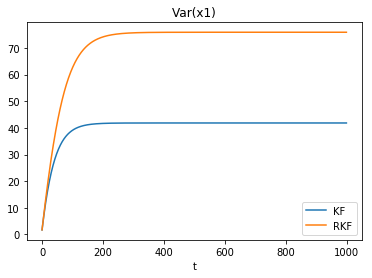

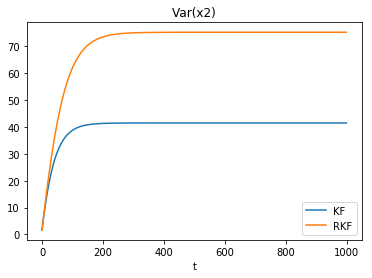

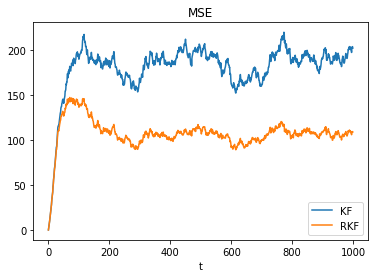

In [134]:
# uncertainty
Delta = 10.

# initialize placeholders
X = np.zeros((N,T,n))
Z = np.zeros((N,T,m))
Vkf = np.zeros((N,T,n))
Vrkf = np.zeros((N,T,n))
EVkf = np.zeros((N,T))
EVrkf = np.zeros((N,T))

# run trials
for i in tnrange(N):
    # initialize filters
    x0_hat = np.zeros(n)
    kf = KalmanFilter(dim_x=n, dim_z=m)
    kf.x = x0_hat
    kf.F = F
    kf.H = H
    kf.P = P
    kf.R = R
    kf.Q = Q

    rkf = KLKalmanFilter(dim_x=n, dim_z=m)
    rkf.x = x0_hat
    rkf.F = F
    rkf.H = H
    rkf.P = P
    rkf.R = R
    rkf.Q = Q

    for t in range(T):
        # run model
        delta = rd.uniform(-Delta,Delta)
        if t==0:
            X[i,t,:] = x0
        else:
            Ft = F + np.array([[0.,.099*delta],[0.,0.]])
            X[i,t,:] = dot(Ft,X[i,t-1,:]) + rd.multivariate_normal(np.zeros(n),Q)
        Z[i,t,:] = dot(H,X[i,t,:]) + rd.multivariate_normal(np.zeros(m),R)
        
        # run filter
        kf.predict()
        kf.update(Z[i,t,:])
        rkf.predict()
        rkf.update(Z[i,t,:],c=5e-5)
        Vkf[i,t,:] = np.diag(kf.P)
        Vrkf[i,t,:] = np.diag(rkf.P)
        EVkf[i,t] = np.linalg.norm(X[i,t,:]-kf.x)**2
        EVrkf[i,t] = np.linalg.norm(X[i,t,:]-rkf.x)**2
        
# compute averages over trials
Vkf = Vkf.mean(axis=0)
Vrkf = Vrkf.mean(axis=0)
EVkf = EVkf.mean(axis=0)
EVrkf = EVrkf.mean(axis=0)

# plot
ts = np.arange(T)
p = plt.figure()
plt.plot(ts,Vkf[:,0],label='KF')
plt.plot(ts,Vrkf[:,0],label='RKF')
plt.title('Var(x1)')
plt.xlabel('t')
plt.legend()
plt.show()
p.savefig('img/large_tv/v1.eps', format='eps', dpi=200)

p = plt.figure()
plt.plot(ts,Vkf[:,1],label='KF')
plt.plot(ts,Vrkf[:,1],label='RKF')
plt.title('Var(x2)')
plt.xlabel('t')
plt.legend()
plt.show()
p.savefig('img/large_tv/v2.eps', format='eps', dpi=200)

p = plt.figure()
plt.plot(ts,EVkf,label='KF')
plt.plot(ts,EVrkf,label='RKF')
plt.title('MSE')
plt.xlabel('t')
plt.legend()
plt.show()
p.savefig('img/large_tv/mse.eps', format='eps', dpi=200)